## Benchmark

The `bench.tsv` data contains results from benchmarking a web service.
Each row represents a request, and contains the following fields:
- latency (ms)
- httpStatusCode
- size (bytes)


In [1]:
import pl from "npm:nodejs-polars";
import * as Plot from "npm:@observablehq/plot";
import { DOMParser } from "npm:linkedom";

In [2]:
const document: any = new DOMParser().parseFromString(
  `<!DOCTYPE html><html lang="en"></html>`,
  "text/html",
);

In [3]:
const df = pl.readCSV('./bench.tsv', { sep: "\t" });
df.head()

worker_id,latency,httpStatusCode,size
2,3701,200,139310
2,1919,200,139310
3,6841,200,139310
8,6841,200,139310
1,7108,200,139310


In [4]:
const percentile = [1, 0.99, 0.95, 0.9, 0.75, 0.5, 0];
const value = percentile.map(p => df["latency"].quantile(p));
const unit = percentile.map(_ => "ms");

const percentileDf = new pl.DataFrame({ percentile, value, unit });

percentileDf;

percentile,value,unit
1,7794,ms
0.99,7388,ms
0.95,7189,ms
0.9,2406,ms
0.75,1925,ms
0.5,1741,ms
0,1399,ms


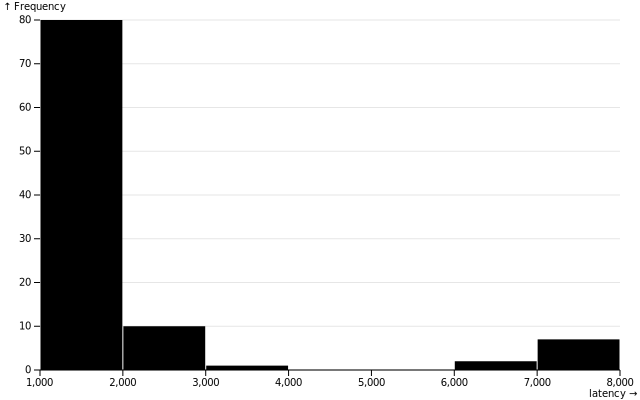

In [5]:
Plot.plot({
  y: { grid: true },
  document,
  marks: [
    Plot.rectY(df.toRecords(), Plot.binX({ y: "count" }, { x: "latency" })),
    Plot.ruleY([0])
  ]
});